In [46]:
#Tutorial on census data access through Cenpy (pronounced sen-pi) 

In [16]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cenpy import products

In [44]:
#"Cenpy (pronounced sen-pie) is a package that automatically discovers US Census Bureau API endpoints and exposes them to Python in a consistent fashion."
#https://cenpy-devs.github.io/cenpy/
#Retrieves data from products ACS-5, and Decenial Census
#let's get variables from the ACS table for all the tracts in Philadelphia county, PA. 
#For this demo, we'll use the API for American Community Survey (ACS), year 2019, at census tract geography level. 
#We can request for all the tracts in Philadelphia County the variables: 
#RACE: Total: Total population -- (Estimate) B02001_001E
#RACE: Total: White alone: Total population -- (Estimate) B02001_002E
#RACE: Total: Black or African American alone: Total population -- (Estimate) B02001_003E
#Estimate!!Median age!!Total (B01002H_001E) 
#The link below provides an overview of the ACS Summary File and how it can be used to access data on America’s communities. 
#https://www.census.gov/programs-surveys/acs/technical-documentation/summary-file-documentation.html
#API reference for Cenpy is available at https://cenpy-devs.github.io/cenpy/api.html


In [42]:
#using the following method we will retrieve the census data variables from the year 2019, ACS-5 table as a pandas dataframe
#cenpy API revolves around products (ACS 5year summary and Decenial census), which integrate the geographic and the data APIs together.
acstest = products.ACS(2019)
tbl = acstest.from_county('Philadelphia, PA', level='tract',variables=['B02001_001E','B02001_002E','B02001_003E', 'B01002H_001E'])
 

C:\Users\gmisgna\Anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [43]:
#display retrieved census data table
tbl.head()

,GEOID,geometry,B01002H_001E,B02001_001E,B02001_002E,B02001_003E,NAME,state,county,tract
0,42101005500,"POLYGON ((-8377414.740 4851362.550, -8377188.3...",53.5,6321.0,1056.0,4501.0,"Census Tract 55, Philadelphia County, Pennsylv...",42,101,005500
1,42101011700,"POLYGON ((-8376563.250 4864654.560, -8376311.7...",19.2,1957.0,878.0,763.0,"Census Tract 117, Philadelphia County, Pennsyl...",42,101,011700
2,42101010200,"POLYGON ((-8375188.570 4861182.680, -8375179.8...",NaN,3344.0,120.0,3175.0,"Census Tract 102, Philadelphia County, Pennsyl...",42,101,010200
3,42101008500,"POLYGON ((-8374792.940 4859373.210, -8374787.6...",35.9,6803.0,478.0,5885.0,"Census Tract 85, Philadelphia County, Pennsylv...",42,101,008500
4,42101010600,"POLYGON ((-8372487.400 4861398.670, -8372471.2...",53.8,1704.0,79.0,1478.0,"Census Tract 106, Philadelphia County, Pennsyl...",42,101,010600


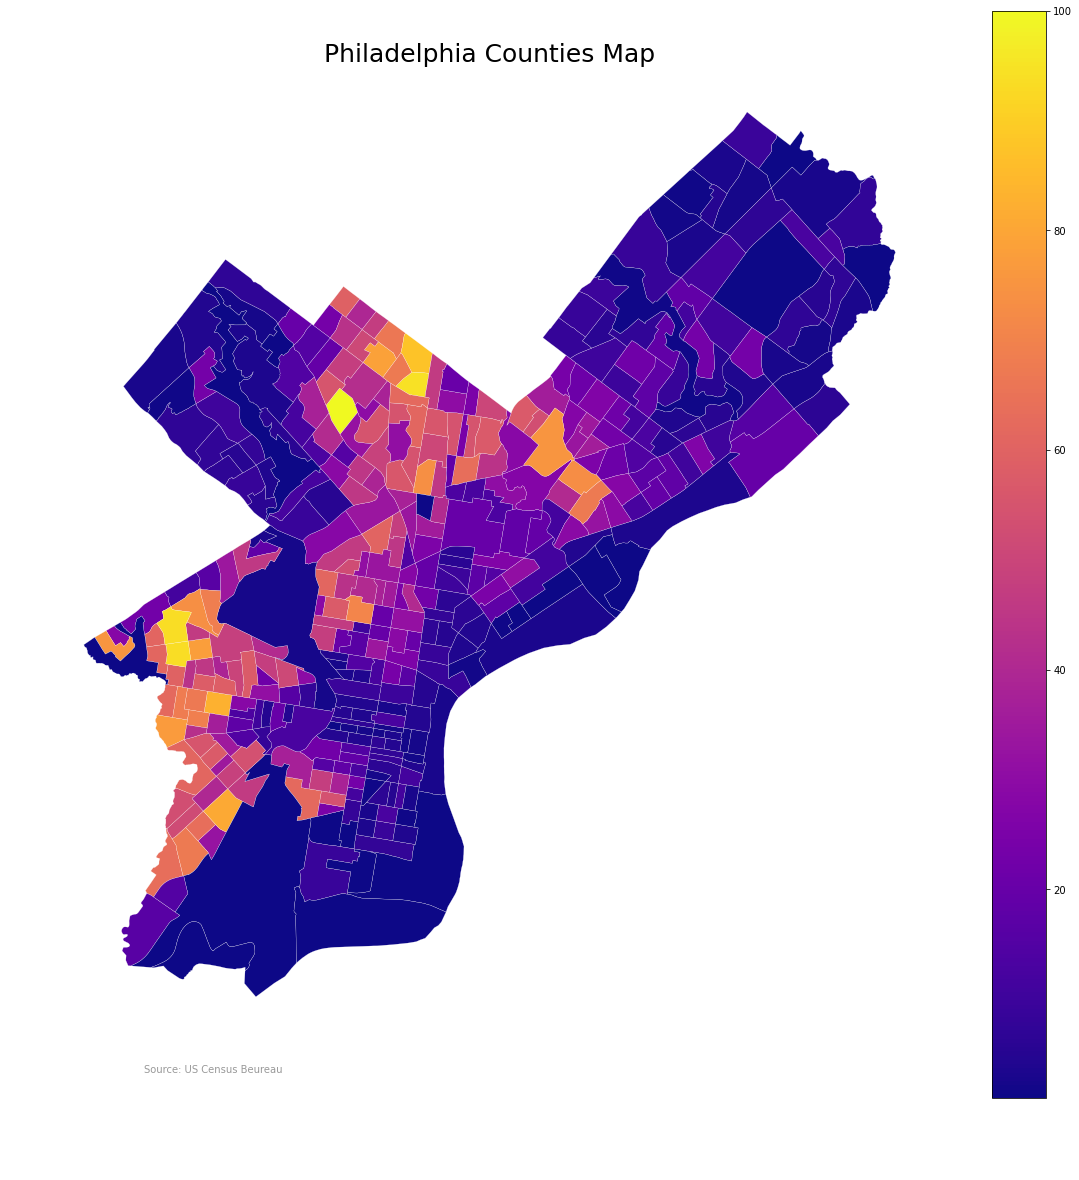

In [39]:
# set the range for the choropleth
vmin, vmax = 1, 100

# create figure and axes for Matplotlib
fig,ax = plt.subplots(1,1,figsize=(20,20))

# create map, for a retrieved variable 
variable = 'B02001_003E'
tbl.plot(column=variable, edgecolor='white', cmap='plasma', ax=ax, linewidth=.2)

fig,ax.set_facecolor('k')

# Now we can customise and add annotations

# remove the axis
fig,ax.axis('off')

# add a title
fig,ax.set_title('Philadelphia Counties Map', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})
# create an annotation for the  data source
fig,ax.annotate('Source: US Census Beureau',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#999999')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

#set the map display extent
#ax.set(xlim=(-150, -50), ylim=(25, 75))

In [41]:
# this will save the figure as a high-res jpg. you can also save as svg
fig.savefig('testmap.jpg', dpi=300)

#this will save the census data table in pdframe as csv file
tbl.to_csv('philly.csv')